In [1]:
#import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataset path
DATASET_PATH = os.path.join("datasets" , "Stack-OverFlow-2017")

def load_data(dataset_path=DATASET_PATH):
    """Loads data from path."""
    csv_path = os.path.join(dataset_path, "survey_results_public.csv")
    return pd.read_csv(csv_path)

df = load_data()

In [2]:
df.index #no need really only if u need to indicate the amount of people taking the survey

RangeIndex(start=0, stop=51392, step=1)

In [3]:
display(df.columns.tolist())

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

# 1) DOES SALARY HAVE AN EFFECT ON CAREER SATISFACTION?

We need to know the relationship between career satisfaction , in order to determine if they would be good metrics for success for the stackflow survey's software developers

In [4]:
#Data Preparation, Selecting relevant columns
cols = ['CareerSatisfaction', 'University','EmploymentStatus','FormalEducation','MajorUndergrad','Salary','JobSatisfaction','Respondent','HomeRemote', 'Gender']
df_cols = df[cols]
df_cols.head()


,CareerSatisfaction,University,EmploymentStatus,FormalEducation,MajorUndergrad,Salary,JobSatisfaction,Respondent,HomeRemote,Gender
0,NaN,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,1,NaN,Male
1,NaN,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,2,"More than half, but not all, the time",Male
2,8.0,No,Employed full-time,Bachelor's degree,Computer science or software engineering,113750.0,9.0,3,"Less than half the time, but at least one day ...",Male
3,6.0,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,NaN,3.0,4,"Less than half the time, but at least one day ...",Male
4,6.0,No,Employed full-time,Master's degree,Computer science or software engineering,NaN,8.0,5,Never,NaN


In [5]:
# Cleaning out the data , dropping rows with empty data
df_selectedcols = df_cols.dropna(how = 'any')
df_selectedcols.head() #since we know its cleaned, its there a need.

,CareerSatisfaction,University,EmploymentStatus,FormalEducation,MajorUndergrad,Salary,JobSatisfaction,Respondent,HomeRemote,Gender
2,8.0,No,Employed full-time,Bachelor's degree,Computer science or software engineering,113750.0,9.0,3,"Less than half the time, but at least one day ...",Male
14,8.0,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,100000.0,8.0,15,All or almost all the time (I'm full-time remote),Male
17,9.0,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,130000.0,8.0,18,All or almost all the time (I'm full-time remote),Male
22,8.0,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,100764.0,9.0,23,A few days each month,Male
25,7.0,No,Employed full-time,Master's degree,Computer science or software engineering,175000.0,7.0,26,"Less than half the time, but at least one day ...",Male


In [6]:
df2_cols=df[cols[:8 :5]] #hard to index, but optional to inculde, meaning we have to specify what columns we are including
df2_cols.head()

,CareerSatisfaction,Salary
0,NaN,NaN
1,NaN,NaN
2,8.0,113750.0
3,6.0,NaN
4,6.0,NaN


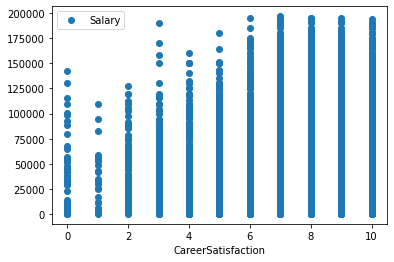

In [7]:
# Checking the relationship of CareerSatisfaction and Salary
df2_cols.plot(x='CareerSatisfaction', y='Salary', style='o')

d = {'CareerSatisfaction' : np.random.rand(10),
     'Salary' : np.random.rand(10)}

df2 = pd.DataFrame(d)


# As shown in the figure/plot above, Salary has an impact on the Career Satisfaction of software developers

# 2. DO YOU NEED TO ATTEND A UNIVERSITY BEFORE BECOMING A SUCCESSFUL SOFTWARE DEVELOPER?¶


In [8]:
df_cols['University'].value_counts()

No                     37543
Yes, full-time          9369
Yes, part-time          3352
I prefer not to say     1128
Name: University, dtype: int64

<AxesSubplot:>

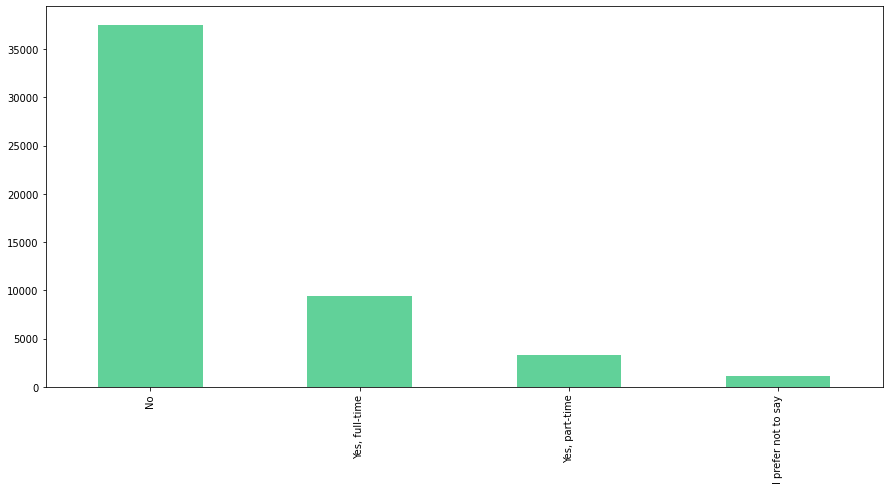

In [9]:
df_cols['University'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

# OVER 37000 DEVS DID NOT ATTEND UNIVERSITY

In [10]:
def df_eq(col, row ):
    """Shortens df_cols[col]== row"""
    
    return (df_cols[col]== row)

def df_gr(col, row):
    """ Shortens df_cols[col]>= row """ 
    return (df_cols[col] >= row)

def df_lt(col,row):
    """ Shortens df_cols[col]<= row """
    return (df_cols[col] <= row)

In [11]:
df_cols[df_eq('EmploymentStatus','Employed full-time')].shape

(36148, 10)

# Over 36000 Devs are Employed Fulltime

In [12]:
university=df_eq('University', 'No') #using the df_col function to reduce complexity/ boilerplate
employed=df_eq('EmploymentStatus','Employed full-time')
dev_nem=df_cols[university & employed ]#devs employed full time that didnt attend university
dev_nem

,CareerSatisfaction,University,EmploymentStatus,FormalEducation,MajorUndergrad,Salary,JobSatisfaction,Respondent,HomeRemote,Gender
2,8.0,No,Employed full-time,Bachelor's degree,Computer science or software engineering,113750.0,9.0,3,"Less than half the time, but at least one day ...",Male
3,6.0,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,NaN,3.0,4,"Less than half the time, but at least one day ...",Male
4,6.0,No,Employed full-time,Master's degree,Computer science or software engineering,NaN,8.0,5,Never,NaN
6,7.0,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,NaN,6.0,7,"Less than half the time, but at least one day ...",Male
7,7.0,No,Employed full-time,Master's degree,Computer science or software engineering,NaN,7.0,8,All or almost all the time (I'm full-time remote),Male
...,...,...,...,...,...,...,...,...,...,...
51386,7.0,No,Employed full-time,Some college/university study without earning ...,Something else,NaN,4.0,51387,It's complicated,Male
51387,7.0,No,Employed full-time,Bachelor's degree,A social science,58000.0,3.0,51388,A few days each month,Male
51389,10.0,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",NaN,10.0,51390,"Less than half the time, but at least one day ...",NaN
51390,6.0,No,Employed full-time,Bachelor's degree,Computer science or software engineering,40000.0,7.0,51391,Never,Male


Only 30,000 Devs employed full time that did not attend university.

In [13]:
dev_nem.shape[0] / df.shape[0] 

0.5836706102117061

# ANS: NO, 58% OF THOSE WHO TOOK THE SURVEY SATISFY THIS REQUIREMENT

In [14]:
dev_sat1= df_lt('CareerSatisfaction', 4.0) #include comments here
dev_sat2= df_eq('CareerSatisfaction' , 5.0)
dev_sat3= df_gr ('CareerSatisfaction' , 6.0)
          
dev_sad= df_cols[ dev_sat1 & university  & employed]

dev_satisfied = df_cols[dev_sat2 & university  & employed]

dev_happy = df_cols[ dev_sat3 &  university & employed ]

In terms of Career Satisfaction

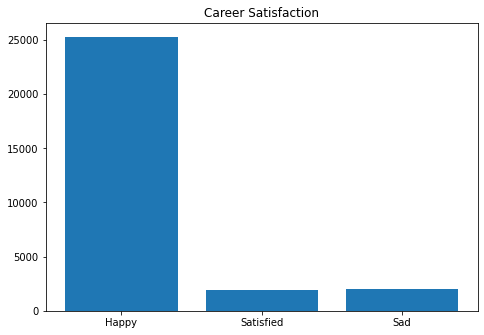

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
satisfaction = ['Happy', 'Satisfied','Sad']
num = [len(dev_happy), len(dev_satisfied), len(dev_sad)]
ax.bar(satisfaction, num)
ax.set_title('Career Satisfaction')
plt.show()

# ABOUT 25000 OUT OF THE 30000 FULL TIME EMPLOYED DEVS WHO DID NOT ATTEND UNIVERSITY ARE HAPPY WITH THEIR JOBS

In [16]:
dev_happy.shape[0]/dev_nem.shape[0]

0.8431790905454061

# 84% of the developers that did not attend university and are employed full time are happy with their jobs.

# When it comes to Salaries...

In [17]:
dev = df_cols[(df_gr('CareerSatisfaction' , 1.0) &  university & employed )]

#calculate mean average of salaries
dev['Salary'].mean()

60198.957157869925

# THESE DEVELOPERS WALK HOME WITH AN AVERAGE OF OVER $60,000.

In terms of Career Satisfaction for those that attended university full time

In [18]:
university2=(df_cols['University'] != 'No')
university3=(df_cols['University'] != 'I prefer not to say')
dev_nem2=df_cols[university2 & university3 & employed ]#devs employed full time that  attended university

#dev_nem2 no real need, if u insist..

5688 DEVS attended university both full time and part time and are employed

In [19]:
#change the variables...
dev_sad2=  df_cols[ dev_sat1 & university2 & university3  & employed]

dev_satisfied2 = df_cols[ dev_sat2 & university2 & university3  & employed]

dev_happy2 = df_cols[ dev_sat2 &  university2 & university3 & employed ]

In [20]:
dev_nem2.shape[0] / df.shape[0]

0.11067870485678705

# 11% of Developers went to University and are employed either part time or full time

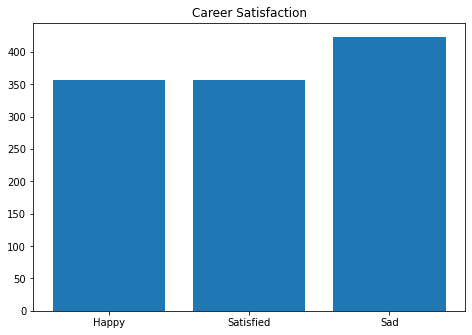

In [21]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
satisfaction2 = ['Happy', 'Satisfied','Sad']
num2 = [len(dev_happy2), len(dev_satisfied2), len(dev_sad2)]
ax2.bar(satisfaction2, num2)
ax2.set_title('Career Satisfaction')
plt.show()

# ABOUT 4000 OUT OF 5688 FULL TIME EMPLOYED DEVS WHO ATTENDED UNIVERSITY ARE HAPPY WITH THEIR JOBS

In [22]:
dev_happy2.shape[0]/dev_nem2.shape[0]

0.06276371308016877

# 72% of the developers who attended University are happy /satisfied with their jobs

In [23]:
dev_part = df_cols[(df_cols['CareerSatisfaction']>=1.0) &  university2 &university3 & employed ]
dev_part['Salary'].mean()

36229.716045887726

#### AN AVERAGE OF $36000

# 3) HOW EFFECTIVE IS WORKING REMOTELY AS A SOFTWARE DEVELOPER.

 We would also use Career Satisfaction and salary as metrics , job satisfaction would be included as well

In [24]:
#But i thought col variable has done the job, u can reuse the variable. by inculding the indexes of col2
#cols2= ['Respondent','EmploymentStatus','University','HomeRemote','CareerSatisfaction', 'JobSatisfaction','Salary']
#df_selectedcols2= df[cols2].dropna(how='any')
#df_selectedcols2.head()



In [25]:
df_selectedcols['HomeRemote'].value_counts()

A few days each month                                      4335
Never                                                      3599
Less than half the time, but at least one day each week    1064
All or almost all the time (I'm full-time remote)           734
It's complicated                                            553
About half the time                                         270
More than half, but not all, the time                       266
Name: HomeRemote, dtype: int64

<AxesSubplot:>

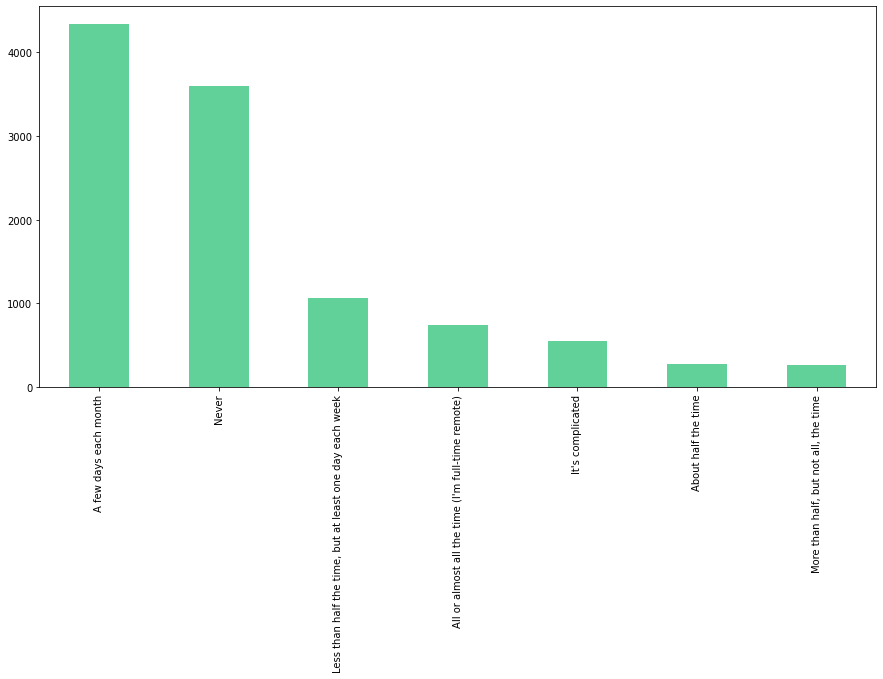

In [26]:
#i think u shld change from bar to aother diagram
df_selectedcols['HomeRemote'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

In [27]:
#i think we shld remove this df dataframe mean()
df['Salary'].mean()

56298.480640629256

In [28]:
df['CareerSatisfaction'].mean() #i think us shld remove this df dataframe mean()

7.300573837685912

In [29]:
df['JobSatisfaction'].mean() #i think us shld remove this df dataframe mean()

6.957078462452943

In [30]:

df_HR1 = df_selectedcols[(df_selectedcols['HomeRemote'] =='All or almost all the time (I\'m full-time remote)')]
df_HR2 = df_selectedcols[(df_selectedcols['HomeRemote'] =='More than half, but not all, the time')]
df_HR3 = df_selectedcols[(df_selectedcols['HomeRemote'] =='About half the time')]
df_HR4 = df_selectedcols[(df_selectedcols['HomeRemote'] == 'Less than half the time, but at least one day each week')]
df_HR5 = df_selectedcols[(df_selectedcols['HomeRemote'] == 'A few days each month')]   
df_HR6 = df_selectedcols[(df_selectedcols['HomeRemote'] == 'It\'s complicated' )]
df_HR7 = df_selectedcols[(df_selectedcols['HomeRemote'] ==  'Never')]

In [31]:
df_selectedcols['HomeRemote']

2        Less than half the time, but at least one day ...
14       All or almost all the time (I'm full-time remote)
17       All or almost all the time (I'm full-time remote)
22                                   A few days each month
25       Less than half the time, but at least one day ...
                               ...                        
51361                More than half, but not all, the time
51371    All or almost all the time (I'm full-time remote)
51382                                                Never
51387                                A few days each month
51390                                                Never
Name: HomeRemote, Length: 10821, dtype: object

In [32]:
#do you mean salary of above 56000 dollars are successful, very tricky metric.
a_HR = df_HR1[(df_HR1['Salary']>=56000)] 
b_HR = df_HR2[(df_HR2['Salary']>=56000)]
c_HR = df_HR3[(df_HR3['Salary']>=56000)]
d_HR = df_HR4[(df_HR4['Salary']>=56000)]
e_HR = df_HR5[(df_HR5['Salary']>=56000)]
f_HR = df_HR6[(df_HR6['Salary']>=56000)]
g_HR = df_HR7[(df_HR7['Salary']>=56000)]

In [33]:
dev_HR = a_HR[(a_HR['CareerSatisfaction']>=7)&(a_HR['JobSatisfaction']>=7)]
dev_HR1 = b_HR[(b_HR['CareerSatisfaction']>=7)&(b_HR['JobSatisfaction']>=7)]
dev_HR2 = c_HR[(c_HR['CareerSatisfaction']>=7)&(c_HR['JobSatisfaction']>=7)]
dev_HR3 = d_HR[(d_HR['CareerSatisfaction']>=7)&(d_HR['JobSatisfaction']>=7)]
dev_HR4 = e_HR[(e_HR['CareerSatisfaction']>=7)&(e_HR['JobSatisfaction']>=7)]
dev_HR5 = f_HR[(f_HR['CareerSatisfaction']>=7)&(f_HR['JobSatisfaction']>=7)]
dev_HR6 = g_HR[(g_HR['CareerSatisfaction']>=7)&(g_HR['JobSatisfaction']>=7)]


In [34]:
a1 = dev_HR.shape[0]/df_HR1.shape[0]
b1 = dev_HR1.shape[0]/df_HR2.shape[0]
c1 = dev_HR2.shape[0]/df_HR3.shape[0]
d1 = dev_HR3.shape[0]/df_HR4.shape[0]
e1 = dev_HR4.shape[0]/df_HR5.shape[0]
f1 = dev_HR5.shape[0]/df_HR6.shape[0]
g1 = dev_HR6.shape[0]/df_HR7.shape[0]

In [35]:
a1 #i think this are not useful after  including a chart below. same for b1-g1

0.47275204359673023

45% of Devs who worked 'All or almost all the time (I'm full-time remote)' are successful

In [36]:
b1

0.31203007518796994

28% of Devs who worked 'More than half, but not all, the time' are successful.

In [37]:
c1

0.34074074074074073

32% of Devs who worked 'About half the time' are successful.

In [38]:
d1

0.37781954887218044

35% of Devs who worked 'Less than half the time, but at least one day each week' are successful

In [39]:
e1

0.34209919261822375

33% of Devs who worked 'A few days each month'remotely are successful

In [40]:
f1

0.2911392405063291

28% of Devs who described working remotely 'It's complicated' are successful

In [41]:
g1

0.2033898305084746

19% of Devs who 'Never'  worked remotely are successful 

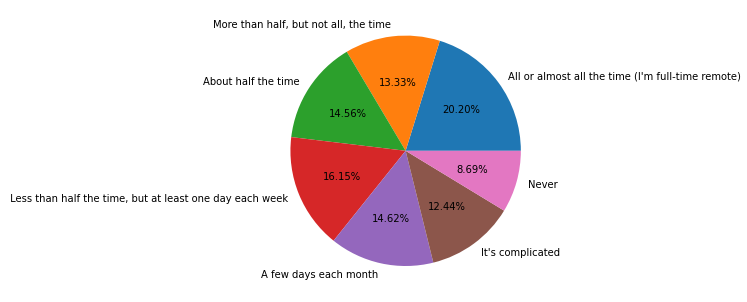

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
HomeRemote = ['All or almost all the time (I\'m full-time remote)','More than half, but not all, the time','About half the time', ' Less than half the time, but at least one day each week', 'A few days each month', 'It\'s complicated','Never']
Developers = [a1,b1,c1,d1,e1,f1,g1]
ax.pie(Developers, labels = HomeRemote, autopct='%1.2f%%')
plt.show()

# 4)PERCENTAGE OF SUCCESSFUL FEMALE SOFTWARE DEVELOPER USING CAREERSATISFACTION AND SALARY AS METRICS

In [43]:
#same thing here, since the original list is not easily indexable, no need for a new list
#fem =['Respondent','CareerSatisfaction','Gender','Salary']
#df_fem = df[fem]

#df_fem.head()


In [44]:
#df_fem2 = df_fem.dropna(how = 'any')
#df_fem2.head()

In [45]:
gender=df_eq('Gender','Female')
CS=(df_cols['CareerSatisfaction'] >= 6.0)
Salary = (df_cols['Salary'] >= 100000) #here u include 100000 dollars as succesful, a_HR says otherwise
dev_fem=df_cols[gender & CS & Salary]#female devs that have high career satisfaction

#dev_fem no need to sh0w it

In [46]:
dev_fem.shape[0]/df.shape[0]

0.002393368617683686

# ONLY 0.2% OF THE SOFTWARE DEVELOPERS THAT TOOK THE SURVEY ARE 'SUCCESSFUL' FEMALES

In [47]:
gender1=df_eq('Gender', 'Male')
#CS=(df_col['CareerSatisfaction'] >= 6.0) 
#Salary = (df_fem2['Salary'] >= 100000)
dev_men=df_cols[gender1 & CS & Salary]#male devs that have high career satisfaction

In [48]:
dev_men.shape[0] / df.shape[0]

0.031230541718555417

# 3% OF THE SOFTWARE DEVELOPERS THAT TOOK THE SURVEY ARE 'SUCCESSFUL' MEN 

# CONCLUSION
Through this project , insights have been given that dislodges popular beliefs on certain decisions a developer should make in their journey to becoming successful in their career.
We can conclude conveniently that a university degree isn’t necessary to being successful as a software developer, and also that working remotely seems to work best for developers .